In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
data_path = ['D:','udemy data sets']
dataset = os.sep.join(data_path + ['Data.csv'])
data = pd.read_csv(dataset)
data


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
X = data.iloc[:, :-1].values  # ":" before the coma select all the row and ":-1" selects all the colums except the last column
y = data.iloc[:, -1].values # ":" before the coma select all the row and -1 select oly the last colums

In [5]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [6]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# imputing process (replacing other values in the missing rows)

In [7]:
#Imputing in the context of data handling refers to the process of replacing missing values in a dataset with substituted values. 
from sklearn.impute import SimpleImputer #module. This class is used to fill missing values in data.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) #This method analyzes the data provided to learn how to impute missing values. It calculates the mean of non-missing values in the specified columns (X[:, 1:3]).
X[:, 1:3] = imputer.transform(X[:, 1:3])  #This method actually fills in the missing values in the specified columns (X[:, 1:3]) with the mean value learned during the fitting step.
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #The LabelEncoder is used to transform categorical class labels into numerical labels.
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [11]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [12]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [13]:
y_test

array([0, 1])

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])

In [15]:
X_train

array([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057777, -0.07013167641635372],
       [1.0, 0.0, 0.0, 0.566708506533324, 0.633562432710455],
       [0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867],
       [0.0, 0.0, 1.0, -1.9018011447007988, -1.420463615551582],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.232653363453549],
       [0.0, 1.0, 0.0, 1.4379472069688968, 1.5749910381638885],
       [1.0, 0.0, 0.0, -0.7401495441200351, -0.5646194287757332]],
      dtype=object)

In [16]:
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830124, -0.9069571034860727],
       [1.0, 0.0, 0.0, -0.44973664397484414, 0.2056403393225306]],
      dtype=object)

# REGRESSION

## SIMPLE LINEAR REGRESSION 11-4-24

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [18]:
data_pathe = ['D:','udemy data set']
dataset = os.sep.join(data_path + ['Salary_Data.csv'])
data = pd.read_csv(dataset)
data


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [11]:
data.shape

(10, 4)

In [19]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [20]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [21]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [15]:
X_train.shape

(8, 5)

In [16]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [17]:
X_test.shape

(2, 5)

In [26]:
y_train

array([116969.,  43525., 109431., 101302., 113812.,  39891.,  37731.,
       105582.,  60150.,  81363.,  57081.,  54445., 112635.,  46205.,
        66029.,  39343.,  67938., 121872., 122391.,  57189.,  64445.,
        56957.,  55794.,  56642.])

In [19]:
y_train.shape

(8,)

In [27]:
y_test

array([83088., 98273., 63218., 93940., 61111., 91738.])

In [20]:
y_test.shape

(2,)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)
y_pred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

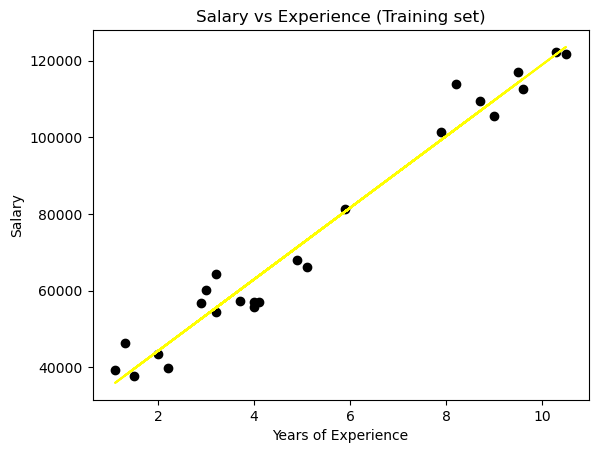

In [30]:
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'yellow')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

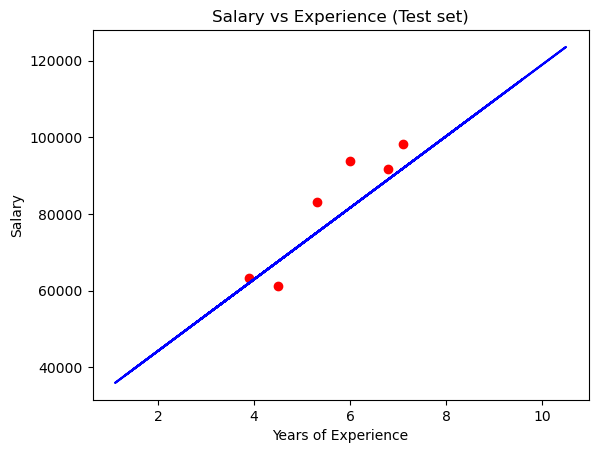

In [31]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [32]:
print(regressor.predict([[12]])) #  Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

#12→scalar 

#[12]→1D array 

#[[12]]→2D array

[137605.23485427]


In [33]:
print(regressor.coef_)
print(regressor.intercept_)
#Salary=9345.94×YearsExperience+26816.19

[9332.94473799]
25609.89799835482


# MULTIPLE LINEAR REGRESSION -16/4/24

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [19]:
dataset = pd.read_csv(r'D:\udemy data sets\startup.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [22]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [23]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train

array([[0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
       [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       

In [28]:
X_test

array([[0.0, 1.0, 0.0, 66051.52, 182645.56, 118148.2],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [29]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [30]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
